In [1]:
#pip install plotnine

In [2]:
#pip install sklearn_pandas

In [3]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn import preprocessing

In [4]:
df=pd.read_csv("C:\\Users\\Murali krishna\\Downloads\\archive\\Student Mental health.csv")

In [5]:
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [6]:
df.shape

(101, 11)

In [7]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [8]:
mode=df["Age"].mode().values[0]
df["Age"]=df["Age"].replace(np.nan,mode)

In [9]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?


In [10]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [11]:
lower_range,upper_range=remove_outlier(df['Age'])
df["Age"]=np.where(df['Age']>upper_range,upper_range,df['Age'])
df["Age"]=np.where(df['Age']<lower_range,lower_range,df['Age'])

## Data Visualization

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


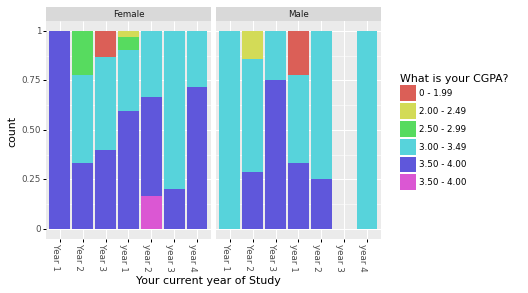

<ggplot: (130462499792)>

In [12]:
(ggplot(df, aes(x = "Your current year of Study", fill = "What is your CGPA?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
 + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


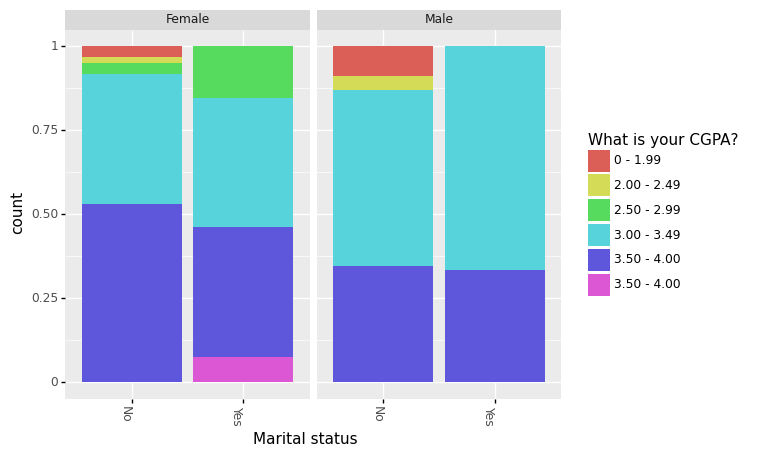

<ggplot: (130463314860)>

In [13]:
(ggplot(df, aes(x = "Marital status", fill = "What is your CGPA?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
 + facet_wrap('Choose your gender')
)

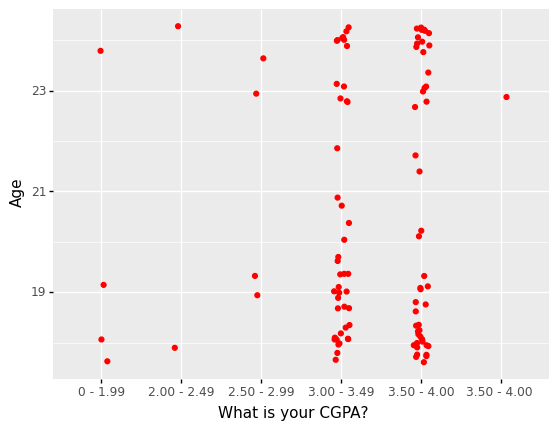

<ggplot: (130463408909)>

In [14]:
(ggplot(df, aes(x="What is your CGPA?", y="Age"))
 + geom_jitter(position=position_jitter(0.1), color= "red")
)

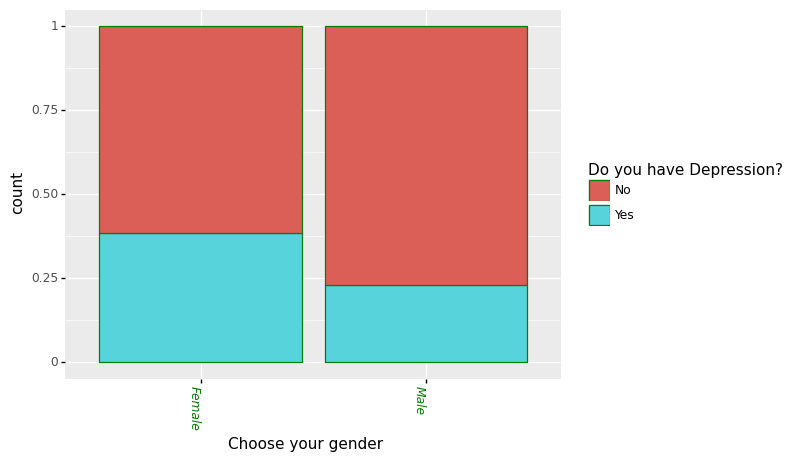

<ggplot: (130463398178)>

In [15]:
(ggplot(df, aes(x = "Choose your gender", fill = "Do you have Depression?"))
 + geom_bar(position="fill",color='green')
 + theme(axis_text_x = element_text(angle = -90, hjust = 1,style='italic',color='green'))
#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


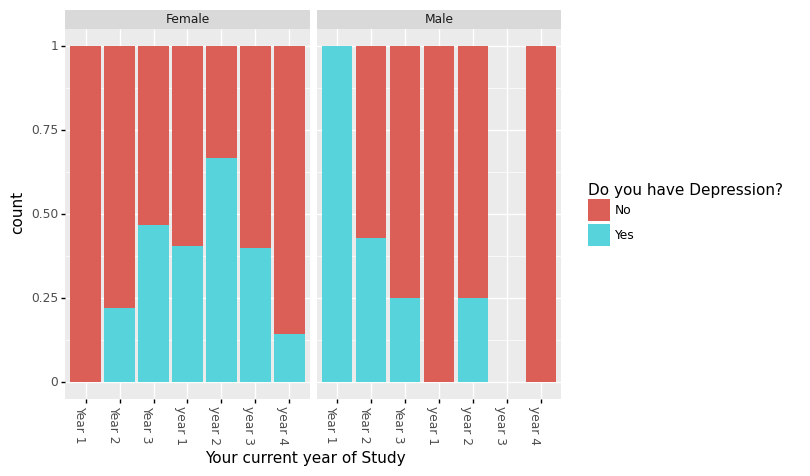

<ggplot: (130463483380)>

In [16]:
(ggplot(df, aes(x = "Your current year of Study", fill = "Do you have Depression?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


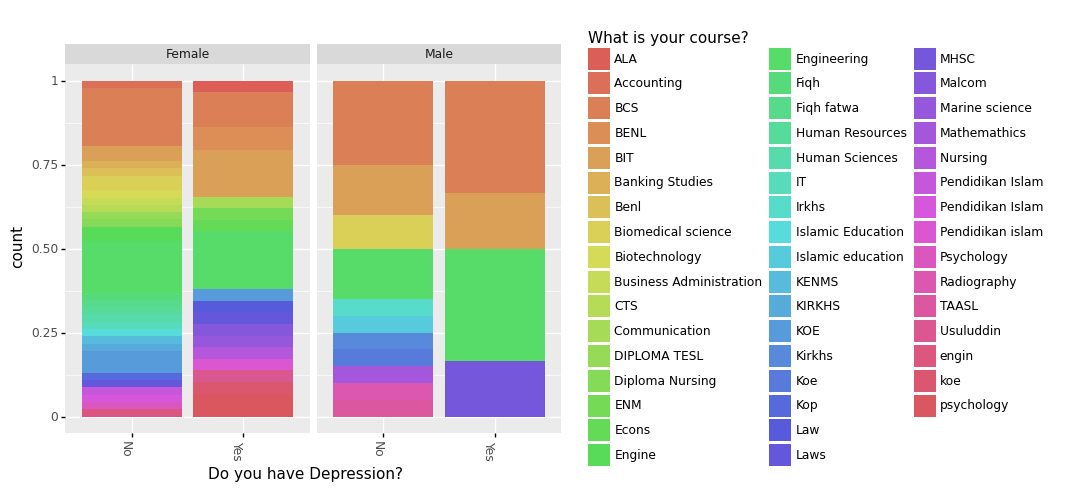

<ggplot: (130463480194)>

In [17]:
(ggplot(df, aes(x = "Do you have Depression?", fill = "What is your course?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


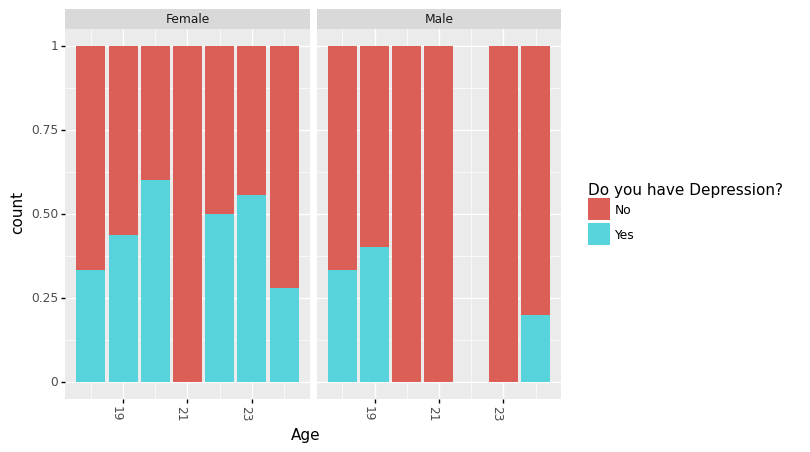

<ggplot: (130463333364)>

In [18]:
(ggplot(df, aes(x = "Age", fill = "Do you have Depression?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


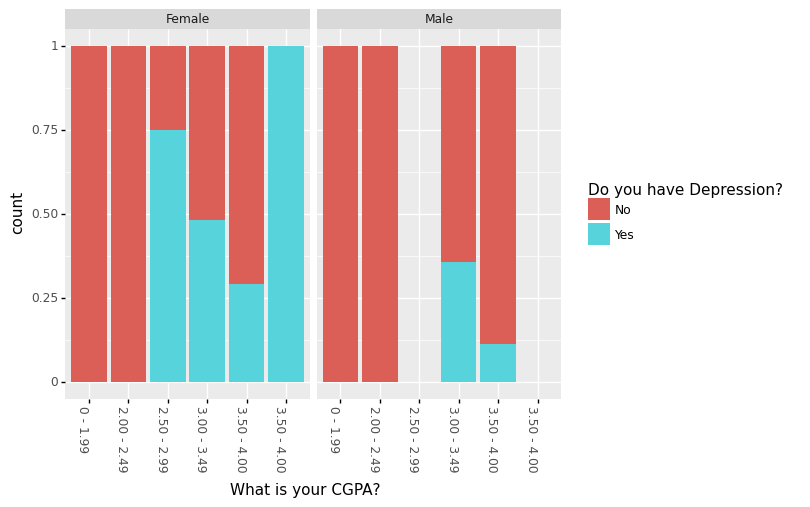

<ggplot: (130462499738)>

In [19]:
(ggplot(df, aes(x = "What is your CGPA?", fill = "Do you have Depression?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


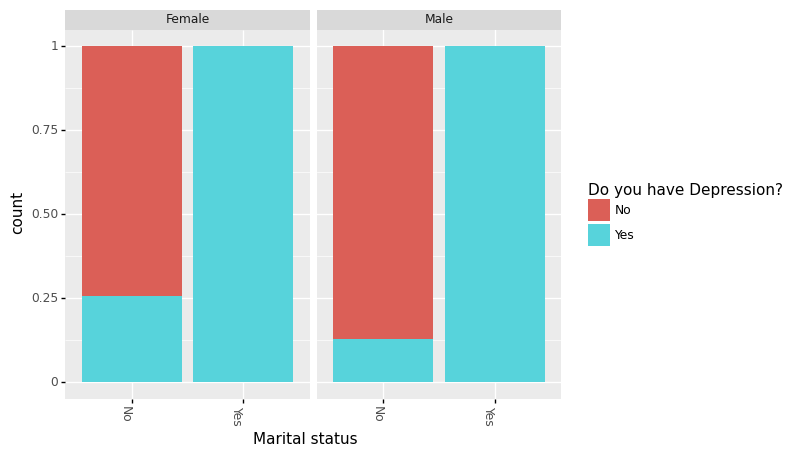

<ggplot: (130463415589)>

In [20]:
(ggplot(df, aes(x = "Marital status", fill = "Do you have Depression?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


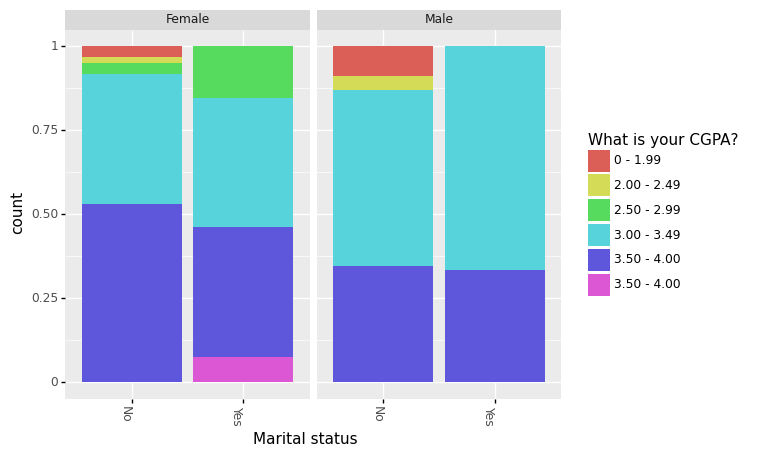

<ggplot: (130464008867)>

In [21]:
(ggplot(df, aes(x = "Marital status", fill = "What is your CGPA?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


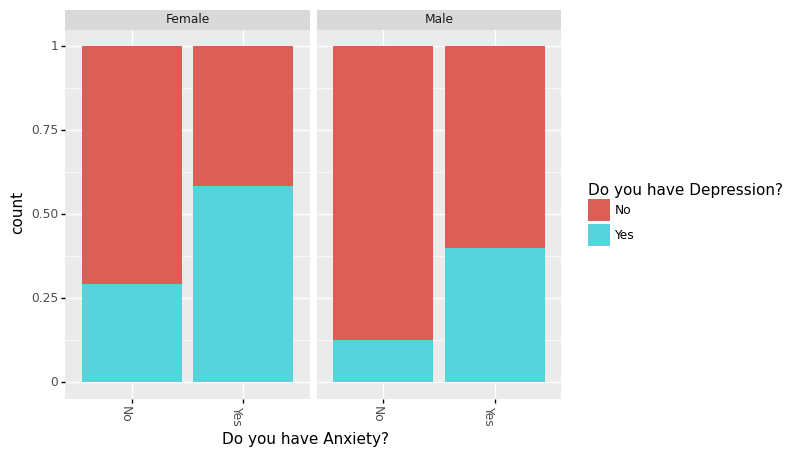

<ggplot: (130464387753)>

In [22]:
(ggplot(df, aes(x = "Do you have Anxiety?", fill = "Do you have Depression?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


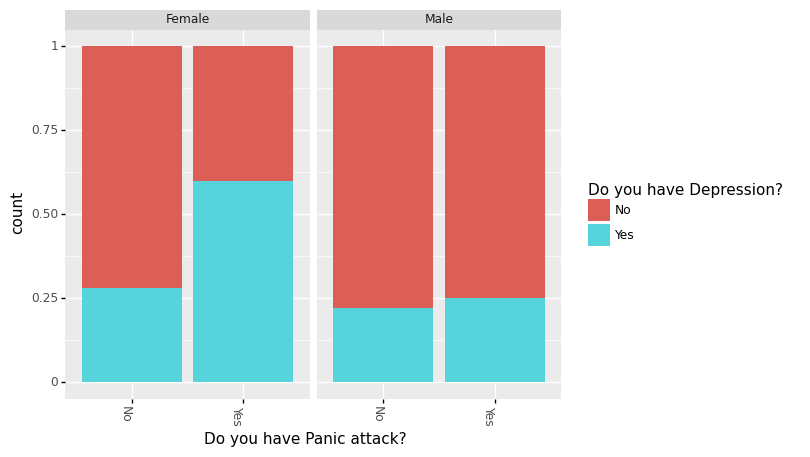

<ggplot: (130464419985)>

In [23]:
(ggplot(df, aes(x = "Do you have Panic attack?", fill = "Do you have Depression?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

C:\Users\Murali krishna\anaconda3\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


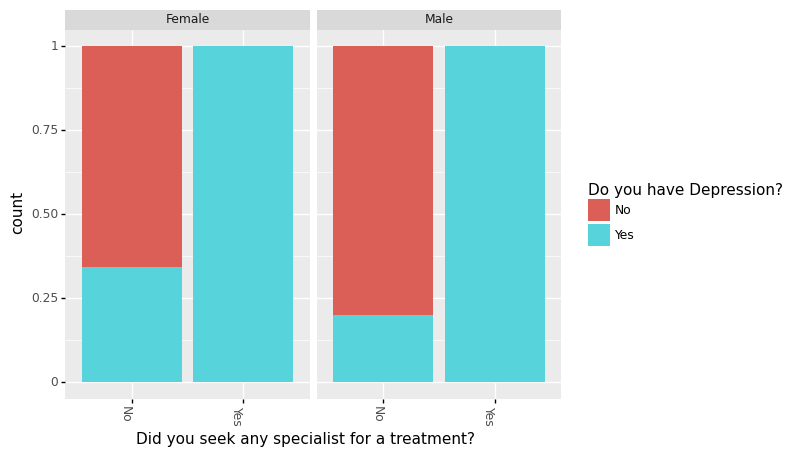

<ggplot: (130464846568)>

In [24]:
(ggplot(df, aes(x = "Did you seek any specialist for a treatment?", fill = "Do you have Depression?"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
  + facet_wrap('Choose your gender')#Original was ~Sex
)

## Label Encoding

In [25]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Choose your gender'.
df['Choose your gender']= label_encoder.fit_transform(df['Choose your gender'])
  
df['Choose your gender'].unique()

array([0, 1])

In [26]:
df['What is your course?']= label_encoder.fit_transform(df['What is your course?'])
df['What is your course?'].unique()

array([17, 25,  4, 33, 37, 41,  2, 20, 23, 42, 26,  1, 14, 36, 28,  5,  9,
       32, 27, 45, 44, 16,  0,  7, 47, 29,  3,  6, 22, 10, 46, 15, 34, 35,
       31, 21,  8, 11, 13, 40, 43, 48, 19, 12, 30, 18, 24, 38, 39])

In [27]:
df['Your current year of Study']= label_encoder.fit_transform(df['Your current year of Study'])
df['Your current year of Study'].unique()

array([3, 4, 0, 5, 6, 1, 2])

In [28]:
df['What is your CGPA?']= label_encoder.fit_transform(df['What is your CGPA?'])
df['What is your CGPA?'].unique()

array([3, 4, 5, 2, 1, 0])

In [29]:
df['Marital status']= label_encoder.fit_transform(df['Marital status'])
df['Marital status'].unique()

array([0, 1])

In [30]:
df['Do you have Depression?']= label_encoder.fit_transform(df['Do you have Depression?'])
df['Do you have Depression?'].unique()

array([1, 0])

In [31]:
df['Do you have Anxiety?']= label_encoder.fit_transform(df['Do you have Anxiety?'])
df['Do you have Anxiety?'].unique()

array([0, 1])

In [32]:
df['Do you have Panic attack?']= label_encoder.fit_transform(df['Do you have Panic attack?'])
df['Do you have Panic attack?'].unique()

array([1, 0])

In [33]:
df['Did you seek any specialist for a treatment?']= label_encoder.fit_transform(df['Did you seek any specialist for a treatment?'])
df['Did you seek any specialist for a treatment?'].unique()

array([0, 1])

In [34]:
df['Choose your gender']= label_encoder.fit_transform(df['Choose your gender'])
df['Choose your gender'].unique()

array([0, 1], dtype=int64)

In [35]:
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,0,18.0,17,3,3,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,25,4,3,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,4,0,3,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,33,5,3,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,37,6,3,0,0,0,0,0


In [36]:
df.dtypes

Timestamp                                        object
Choose your gender                                int64
Age                                             float64
What is your course?                              int32
Your current year of Study                        int32
What is your CGPA?                                int32
Marital status                                    int32
Do you have Depression?                           int32
Do you have Anxiety?                              int32
Do you have Panic attack?                         int32
Did you seek any specialist for a treatment?      int32
dtype: object

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

C:\Users\Murali krishna\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [38]:
x=df.drop(['Do you have Depression?','Timestamp'],axis=1)
y=df['Do you have Depression?']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [40]:
log=LogisticRegression()

In [41]:
log.fit(x_train,y_train)

LogisticRegression()

In [42]:
log.score(x_train,y_train)

0.8428571428571429

In [43]:
log.score(x_test,y_test)

0.7741935483870968

In [233]:
knn=KNeighborsClassifier(metric='minkowski',n_neighbors=7,p=3)

In [234]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=3)

In [235]:
knn.score(x_train,y_train)

0.7571428571428571

In [236]:
knn.score(x_test,y_test)

0.7096774193548387

In [190]:
svc=svm.SVC(random_state=2)

In [191]:
svc.fit(x_train,y_train)

SVC(random_state=2)

In [192]:
svc.score(x_train,y_train)

0.6714285714285714

In [193]:
svc.score(x_test,y_test)

0.6129032258064516

In [112]:
dt=DecisionTreeClassifier(max_depth=6,max_features=4,min_samples_leaf=4,min_samples_split=4,splitter='random')

In [113]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features=4, min_samples_leaf=4,
                       min_samples_split=4, splitter='random')

In [114]:
dt.score(x_train,y_train)

0.8571428571428571

In [115]:
dt.score(x_test,y_test)

0.8387096774193549

In [92]:
rf=RandomForestClassifier(bootstrap=True,max_depth=6,max_features=6,min_samples_leaf=4,min_samples_split=5,n_estimators=6)

In [93]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=6, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=6)

In [94]:
rf.score(x_train,y_train)

0.8714285714285714

In [95]:
rf.score(x_test,y_test)

0.8387096774193549

In [502]:
ada=AdaBoostClassifier(random_state=2,n_estimators=30,learning_rate=1.1)

In [503]:
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.1, n_estimators=30, random_state=2)

In [504]:
ada.score(x_train,y_train)

0.9285714285714286

In [505]:
ada.score(x_test,y_test)

0.8709677419354839

In [256]:
gb=GradientBoostingClassifier(random_state=2,learning_rate=0.01,n_estimators=50)

In [257]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=2)

In [258]:
gb.score(x_train,y_train)

0.8285714285714286

In [259]:
gb.score(x_test,y_test)

0.8064516129032258

In [512]:
bagg=BaggingClassifier(random_state=2, n_estimators=50,)

In [513]:
bagg.fit(x_train,y_train)

BaggingClassifier(n_estimators=50, random_state=2)

In [514]:
bagg.score(x_train,y_train)

0.9857142857142858

In [515]:
bagg.score(x_test,y_test)

0.8709677419354839

In [573]:
xg=xgb.XGBClassifier(learning_rate=0.11201000012,random_state=2,base_score=0.9,n_estimators=11,max_depth=7,)

In [574]:
xg.fit(x_train,y_train)

[12:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.9, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.11201000012,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=11, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [575]:
xg.score(x_train,y_train)

0.8571428571428571

In [576]:
xg.score(x_test,y_test)

0.8064516129032258

 ### Confusion Matrix for KNN

In [444]:
from sklearn import metrics
predictions=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[18,  1],
       [ 8,  4]], dtype=int64)

<AxesSubplot:>

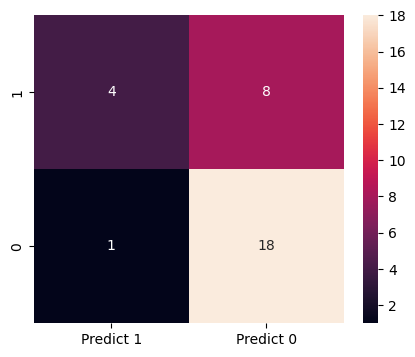

In [448]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm,annot=True,fmt='g')

In [449]:
metrics.accuracy_score(y_test,predictions)

0.7096774193548387

### Confusion Matrix for RandomForest

<AxesSubplot:>

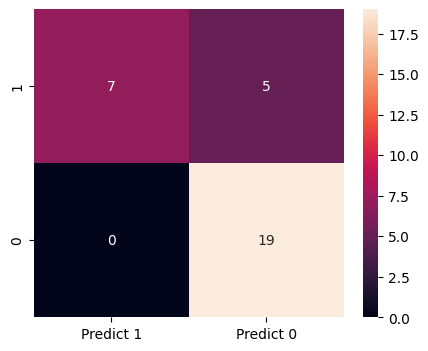

In [450]:
from sklearn import metrics
predictions=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm,annot=True,fmt='g')

In [451]:
metrics.accuracy_score(y_test,predictions)

0.8387096774193549

### Confusion Matrix for Decisiontree

<AxesSubplot:>

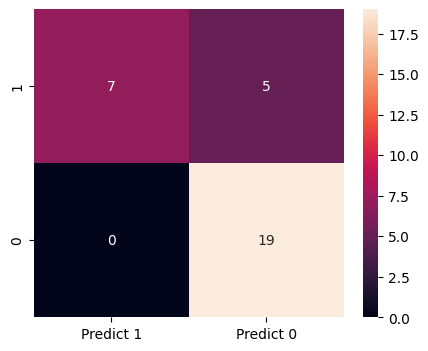

In [452]:
from sklearn import metrics
predictions=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm,annot=True,fmt='g')

In [453]:
metrics.accuracy_score(y_test,predictions)

0.8387096774193549

In [519]:
metrics.recall_score(y_test,predictions)

0.5

In [520]:
metrics.precision_score(y_test,predictions)

1.0

### Confusion Matrix for AdaBoost

<AxesSubplot:>

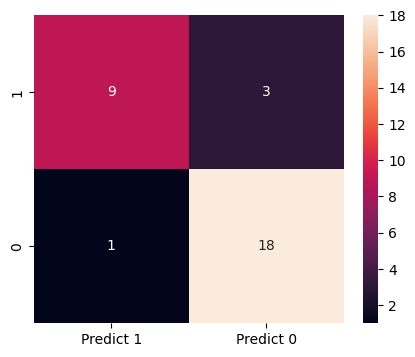

In [507]:
from sklearn import metrics
predictions=ada.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm,annot=True,fmt='g')

In [509]:
metrics.accuracy_score(y_test,predictions)

0.8709677419354839

In [516]:
metrics.recall_score(y_test,predictions)

0.5

In [517]:
metrics.precision_score(y_test,predictions)

1.0

#### Here highprecision and low recall means more importance is given to reduce fp that is no student will falsely labelled as depressed 

### Confusion Matrix for GradientBoost

<AxesSubplot:>

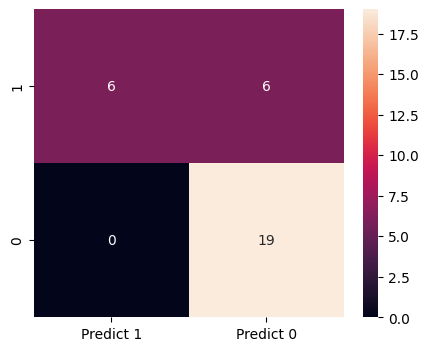

In [510]:
from sklearn import metrics
predictions=gb.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm,annot=True,fmt='g')

In [511]:
metrics.accuracy_score(y_test,predictions)

0.8064516129032258

### Confusion Matrix XGBoost

<AxesSubplot:>

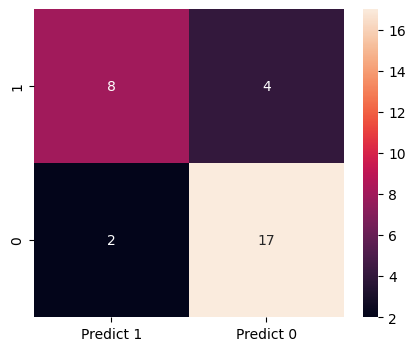

In [577]:
from sklearn import metrics
predictions=xg.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm,annot=True,fmt='g')

In [578]:
metrics.accuracy_score(y_test,predictions)

0.8064516129032258